In [2]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_img, train_labels), (test_img, test_labels) = fashion_mnist.load_data()

(60000, 28, 28)


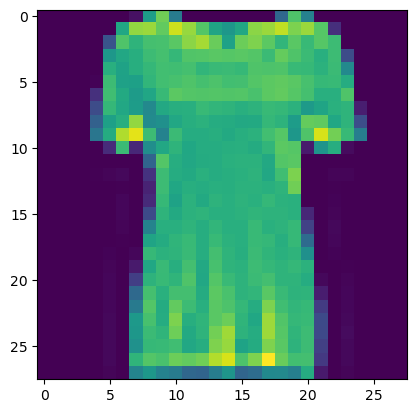

In [4]:
print(train_img.shape)
plt.imshow(train_img[10])

In [5]:
# Conversion de datos
train_img = train_img.astype("float32")/255 # Los pixeles van de 0-255 | se transforma de 0 a 1 
test_img = train_img.astype("float32")/255 # Los pixeles van de 0-255 | se transforma de 0 a 1 

In [6]:
# Cambio de forma
train_img = train_img.reshape(train_img.shape[0],28,28,1) # 1 canal, escala de grises, 3 escala color
test_img = test_img.reshape(train_img.shape[0],28,28,1) # 1 canal, escala de grises, 3 escala color
print(train_img.shape, test_img.shape)

(60000, 28, 28, 1) (60000, 28, 28, 1)


In [7]:
print("before cat:\n",train_labels[0:4])
# Para estandarizar los datos con respecto a las dimensiones
train_labels = tf.keras.utils.to_categorical(train_labels, 10) # Los lleva a 0's y 1's
print("after cat:\n",train_labels[0:4])

test_labels = tf.keras.utils.to_categorical(test_labels, 10)

before cat:
 [9 0 0 3]
after cat:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [8]:
# Modelo de datos
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size=2, padding="same", activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

: 

: 

# Prediccion

In [ ]:
## Compilar y entrenar
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.fit(train_img, train_labels, batch_size=64, epochs=10)

In [ ]:
model.evaluate(test_img, test_labels, verbose=0)